# Task 4.10

## 1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_merged_updated.pkl'))

In [6]:
#check
df

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1768145,156685,106143,26,4,23,5.0,19675,1,1,...,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,1101646,484769,66343,1,6,11,NaN,47210,1,0,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1101647,1561557,66343,2,1,11,30.0,47210,1,1,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,1101648,276317,66343,3,6,15,19.0,47210,1,1,...,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
#distribution check
df.describe()

,Unnamed: 0,order_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_prior_orders,age,Number_of_Dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.709858e+06,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.864575e+05,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.556370e+05,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.390000e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.709176e+06,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.820000e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565919e+06,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.250000e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421081e+06,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [11]:
#dropping "Unnamed"
df = df.drop(columns=['Unnamed: 0'])





## 2

In [23]:
#Adressing PII data
#df_cust_rename_drop = df_cust.drop(columns = ['first_name', 'surname'])

In [24]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_without_ordering  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  busiest_day            object  
 15  busiest_days           object  
 16  busiest_period_of_day  object  
 17  max_order              int64   
 18  loyalty_flag           object  
 19  average_price          float64 
 20  spending_flag          object  
 21  median_prior_orders    float6

## 3

### 3A regional segmentation

In [26]:
#create new region variable 
region = []

In [27]:
#for loop to fill region variable according to directions
for value in df['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [28]:
#insert region as column into df
df['region'] = region


In [29]:
#check region column 
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

### 3B analyze regional spending habits

In [25]:
#check the state column
df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

#### 
Counting Customer Types by Region Based on Spending Flag: Differentiating High and Low Spenders Using Average Product Prices

In [31]:
#create crosstab with data for plotting
crosstab_3 = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [32]:
#check
crosstab_3

spending_flag,High spender,Low spender
region,,
Midwest,156154,7441171
Northeast,108245,5614491
South,210017,10581868
West,160478,8132435


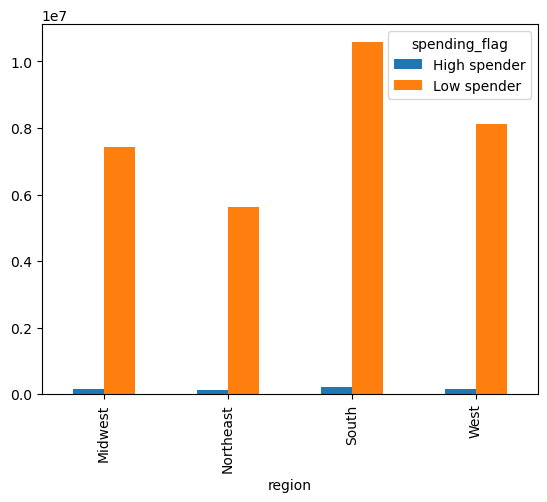

In [33]:
#print bar chart
bar_region_spending = crosstab_3.plot.bar()

In [40]:
path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis'


In [ ]:
#export

In [42]:
save_path = os.path.join(r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis', 'bar_region_spending.png')
bar_region_spending.figure.savefig(save_path)


## conclusion
The Southern region has the highest number of customers in both high and low spending categories. Furthermore, the proportion of high to low spending customers remains relatively consistent across all regions.

In [43]:
#check rows and consistancy
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_without_ordering  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  busiest_day            object  
 15  busiest_days           object  
 16  busiest_period_of_day  object  
 17  max_order              int64   
 18  loyalty_flag           object  
 19  average_price          float64 
 20  spending_flag          object  
 21  median_prior_orders    float6

## 4 


Excluding low revenue customers:
Generate and export a dataframe containing customers with five or more orders.

In [77]:
#create exclusion flag 
df.loc[df['max_order'] < 5, 'order_activity_flag'] = 'Low order activity customer'
df.loc[df['max_order'] >= 5, 'order_activity_flag'] = 'High order activity customer'

In [45]:
#create subset for high value customers
df_high_order_activity = df[df['order_activity_flag'] == 'High order activity customer']

In [46]:
df['order_activity_flag'].value_counts()

High order activity customer    30964564
Low order activity customer      1440295
Name: order_activity_flag, dtype: int64

In [47]:
#export dataframe
save_path = os.path.join(r'C:\Users\ggome\06-2023 Instacart Basket Analysis\02 Data\Prepared Data', '4.10.4_high_order_activity.pkl')
df_high_order_activity.to_pickle(save_path)


## 5

Create data driven customer profiles based on age, income, dependents, and department_id preferences.
A. identify criteria by exploring correlations and each variable
B. segment user_id's based on the unique characteristics identified

### 5A1. income vs age

<Axes: xlabel='age', ylabel='income'>

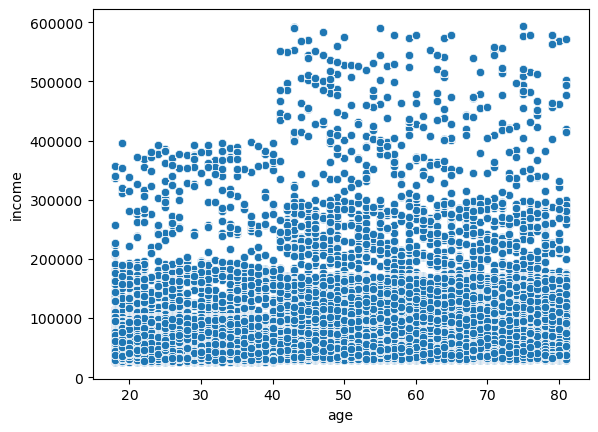

In [48]:
sns.scatterplot(x = 'age', y = 'income',data = df)

Customers are categorized into two groups based on their income level: below 40 and above 40 years old. This segmentation applies to both high-income and low-income customers.

### 5A2. n_dependants vs age


<Axes: xlabel='age', ylabel='Number_of_Dependants'>

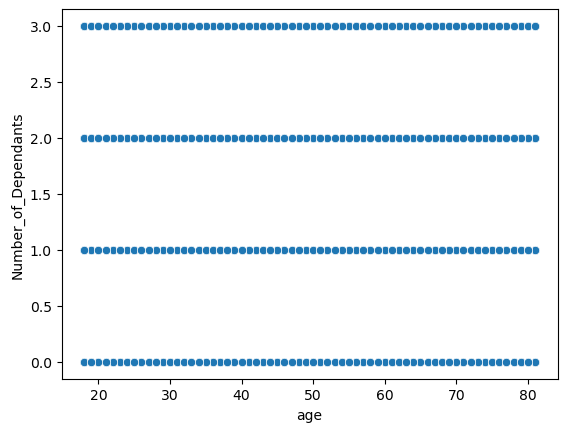

In [53]:
sns.scatterplot(x='age', y='Number_of_Dependants', data=df)


Remarkably, a lack of correlation between age and the number of dependents is evident, while the dispersion of dependents is uniformly distributed across all age groups.

### 5A3. income vs n_dependants


<Axes: xlabel='Number_of_Dependants', ylabel='income'>

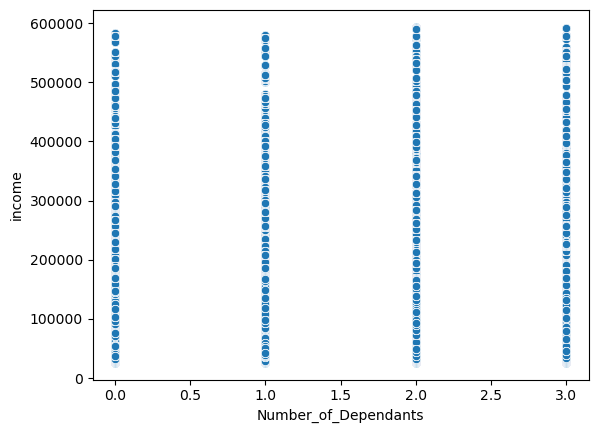

In [55]:
sns.scatterplot(x = 'Number_of_Dependants', y = 'income',data = df)

In this plot, the distribution of income is not clearly associated with the number of dependents, as the two variables do not exhibit a noticeable correlation.

### 5A4. create sample subset to view in line chart

In [56]:
#create list to split dataframe into sample
np.random.seed(5)
dev = np.random.rand(len(df)) <= 0.7

In [57]:
#assign list to create 30% and 70% samples of complete dataframe 
big = df[dev]
small = df[~dev]

In [58]:
#check 
len(big) + len(small)

32404859

In [61]:
#select variables from 30% sample
df_5 = small[['income', 'Number_of_Dependants']]

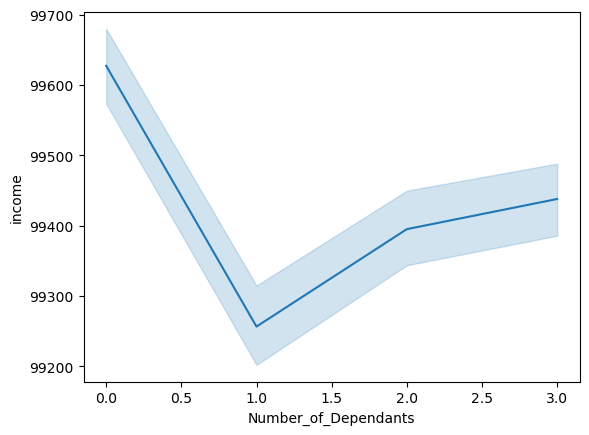

In [63]:
#chart with sample
line_5 = sns.lineplot(data = df_5, x = 'Number_of_Dependants',y = 'income')


The results are inconclusive as the range of income displayed in the line chart is unexpected and does not accurately represent the dataset.

### 5A5. Exploring using the variables

### Age

<Axes: ylabel='Frequency'>

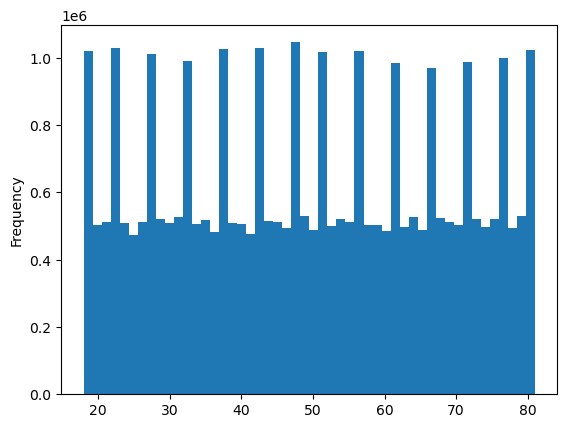

In [64]:
#check distribution 
df['age'].plot.hist(bins = 50)

<Axes: ylabel='Frequency'>

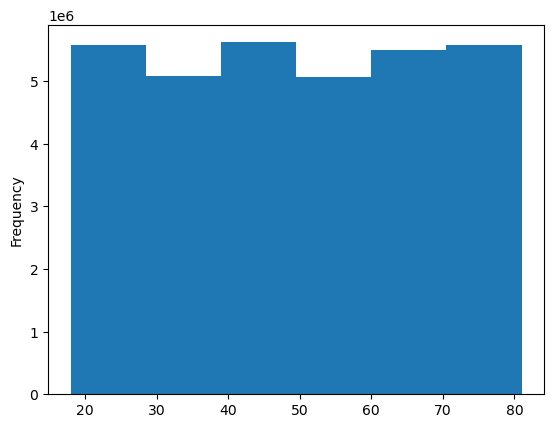

In [65]:
#check distribution 
df['age'].plot.hist(bins = 6)

The distribution of customer ages is fairly even, as evidenced by the similarity between the mean, median, and standard deviation. To segment the age groups, an approximate criterion of 10-year intervals can be used.

### Income

<Axes: ylabel='Frequency'>

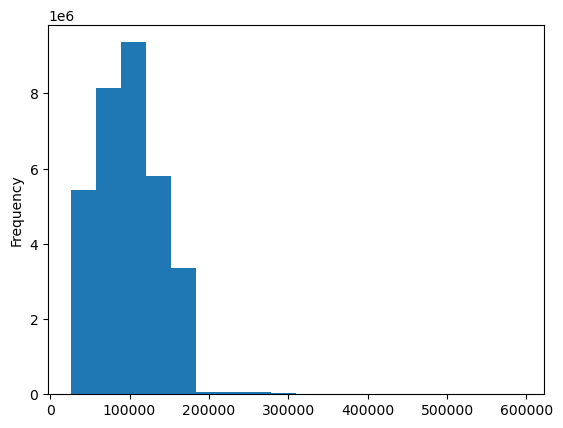

In [66]:
#check distribution,
df['income'].plot.hist(bins = 18)

### Dependants

<Axes: ylabel='Frequency'>

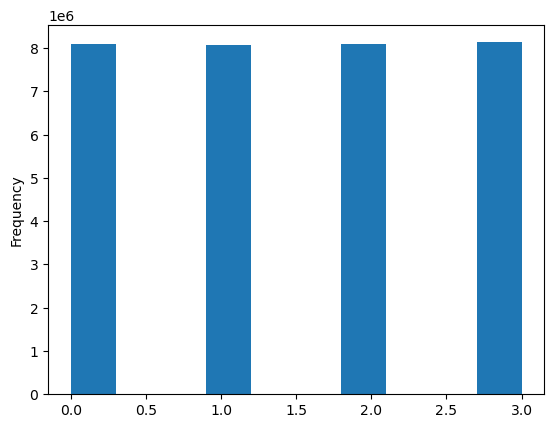

In [68]:
df['Number_of_Dependants'].plot.hist(bins = 10)

In [69]:
df['Number_of_Dependants'].value_counts()

3    8135109
0    8097503
2    8091143
1    8081104
Name: Number_of_Dependants, dtype: int64

### department_id

In [70]:
df['department_id'].value_counts()

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

<Axes: ylabel='Frequency'>

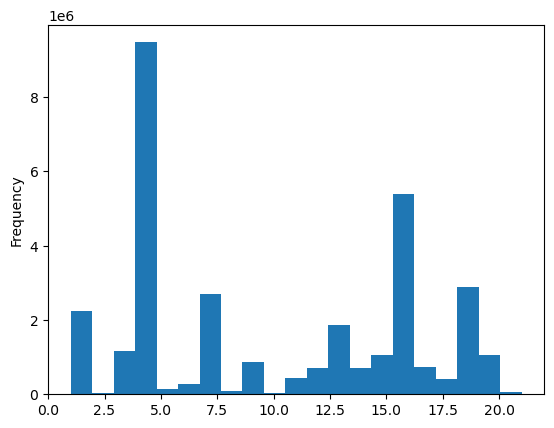

In [71]:
df['department_id'].plot.hist(bins = 21)

## 5B

###  age: divide into approx 10 year age groups

In [72]:
age_group = []

for value in df['age']:
    if value < 30:
        age_group.append('Less than 30')
    elif value >= 30 and value < 40:
        age_group.append('30-39 years')
    elif value >= 40 and value < 50:
        age_group.append('40-49 years')
    elif value >= 50 and value < 60:
        age_group.append('50-59 years')
    elif value >= 60 and value < 70:
        age_group.append('60-69 years')
    else: 
        age_group.append('70+ years')

In [73]:
#create and set column in df
df['age_group'] = age_group

In [74]:
#check 
df['age_group'].value_counts()

Less than 30    6090441
70+ years       6079991
40-49 years     5109237
30-39 years     5073751
50-59 years     5064175
60-69 years     4987264
Name: age_group, dtype: int64

###  Income p/quartille

In [75]:
wealth = []

for value in df['income']:
    if value <= 6.677000e+04:
        wealth.append('lower')
    elif value > 6.677000e+04 and value <= 9.630400e+04:
        wealth.append('lower-middle')
    elif value > 9.630400e+04 and value <= 1.267640e+05:
        wealth.append('upper-middle')
    else:
        wealth.append('upper')

In [76]:
#create and set column in df
df['wealth_status'] = wealth

In [77]:
#check
df['wealth_status'].value_counts()

upper           8312697
lower-middle    8030833
lower           8030749
upper-middle    8030580
Name: wealth_status, dtype: int64

###  Number_of_dependants: independent and caregiver

In [78]:
df.loc[df['Number_of_Dependants'] == 0, 'lifestyle'] = 'independent'

In [79]:
df.loc[df['Number_of_Dependants'] != 0, 'lifestyle'] = 'caregiver'

In [81]:
df['lifestyle'].value_counts()

caregiver      24307356
independent     8097503
Name: lifestyle, dtype: int64

###  department_id: Subset for Meat and non-meat purchases/p house hold

In [80]:
#create exclusion flag column, assign meat consumer to any purchase from meat/seafood department
df.loc[df['department_id'] == 12, 'meat_purchase'] = 'meat_consumer'

In [81]:
# assign meatless to all others 
df.loc[df['department_id'] != 12, 'meat_purchase'] = 'meatless_consumer'

In [9]:
# identify all unique user id's from meat_consumer
inconsistent_values = df.loc[df['meat_purchase'] == 'meat_consumer', 'user_id'].unique()

In [82]:
# update meat_purchase column for consistency
df.loc[df['user_id'].isin(inconsistent_values), 'meat_purchase'] = 'meat_consumer'

In [10]:
#check
df['meat_purchase'].value_counts()

meatless_consumer    31695932
meat_consumer          708927
Name: meat_purchase, dtype: int64

####  split and save dataframe according to consumer profile

In [13]:
#create subset of meat consumer
df_meat_consumer = df[df['meat_purchase'] == 'meat_consumer']

In [88]:
#check
df_meat_consumer

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,product_name,...,date_joined,Number_of_Dependants,marital_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
131,2293453,19,2,5,14,6.0,196,3,0,Soda,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
132,1973799,19,5,6,12,8.0,196,15,1,Soda,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
133,532817,19,7,4,17,6.0,196,1,1,Soda,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
134,2474845,19,6,5,13,20.0,17224,5,0,Oats & Honey Gluten Free Granola,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
135,86918,19,9,5,16,8.0,9387,16,0,Granny Smith Apples,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404260,293966,94920,3,1,8,6.0,15629,2,1,Wine Infused Salame Cheese and Crackers Small ...,...,2/22/2020,1,married,50312,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,9/12/2017,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,9/12/2017,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,9/12/2017,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer


In [90]:
#export as pickel
df_meat_consumer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_meat_consumer_subset.pkl' ))

In [83]:
#create subset of meat consumer
df_not_meat_consumer = df[df['meat_purchase'] == 'meatless_consumer']


In [92]:
#check
df_not_meat_consumer

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,product_name,...,date_joined,Number_of_Dependants,marital_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High order activity customer,30-39 years,lower,caregiver,meatless_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,5/26/2017,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,5/26/2017,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,5/26/2017,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,5/26/2017,0,single,53755,West,High order activity customer,Less than 30,lower,independent,meatless_consumer


In [93]:
#export as pickel
df_not_meat_consumer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_not_meat_consumer_subset.pkl' ))

In [94]:
#check new structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 38 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_without_ordering  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  busiest_day            object  
 15  busiest_days           object  
 16  busiest_period_of_day  object  
 17  max_order              int64   
 18  loyalty_flag           object  
 19  average_price          float64 
 20  spending_flag          object  
 21  median_prior_orders    float6

In [98]:
#export df as 4.10.pkl
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data.pkl'))


## 6

## A - customer with no meat purchases
## B - customer with meat purchases





### A -

In [45]:
#import and clean not relevant
df_no_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_not_meat_consumer_subset.pkl'))

In [100]:
#check/ print columns
df_no_meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642240 entries, 0 to 32404854
Data columns (total 38 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_without_ordering  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  busiest_day            object  
 15  busiest_days           object  
 16  busiest_period_of_day  object  
 17  max_order              int64   
 18  loyalty_flag           object  
 19  average_price          float64 
 20  spending_flag          object  
 21  median_prior_orders    float64

In [16]:
# select the desired columns
selected_columns = ['user_id', 'age_group', 'wealth_status', 'lifestyle', 'marital_status', 'gender', 'loyalty_flag']

In [46]:
# set new dataframe rows based on user_id
clean_no_meat = df_no_meat[selected_columns].drop_duplicates(subset='user_id')

In [126]:
#check
clean_no_meat

,user_id,age_group,wealth_status,lifestyle,marital_status,gender,loyalty_flag
0,1,30-39 years,lower,caregiver,married,Female,New customer
59,15,60-69 years,lower,independent,divorced/widowed,Female,Regular customer
335,21,70+ years,upper-middle,independent,divorced/widowed,Male,Regular customer
986,52,60-69 years,lower,caregiver,married,Female,Regular customer
1153,67,60-69 years,upper-middle,caregiver,married,Female,Regular customer
...,...,...,...,...,...,...,...
32404810,105857,Less than 30,lower,caregiver,married,Female,New customer
32404816,38979,50-59 years,upper,caregiver,married,Female,New customer
32404819,120516,Less than 30,lower-middle,independent,single,Male,New customer
32404826,166751,30-39 years,lower,caregiver,married,Female,New customer


###  wealth status of no meat purchases consumers by age

In [110]:
#create crosstab to evaluate customers' wealth status by age group
crosstab_6v1 = pd.crosstab(clean_no_meat['age_group'], clean_no_meat['wealth_status'], dropna = False)

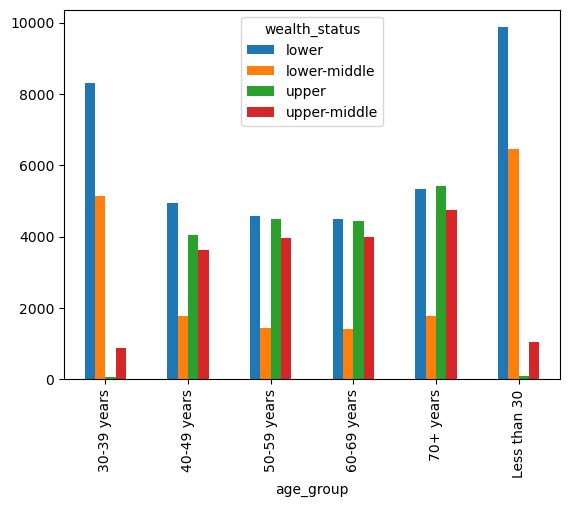

In [111]:
#print chart and save for export
bar_meatless_agegroup_wealthstatus = crosstab_6v1.plot.bar()

Individual customers tend to exhibit below-average income levels, while married customers display a more balanced distribution.

In [117]:
#export
save_path = os.path.join(directory, 'bar_meatless_agegroup_wealthstatus.png')
bar_meatless_agegroup_wealthstatus.figure.savefig(save_path)


### lifestyle of meatless consumers by age

In [128]:
#create crosstab to evaluate customers' lifestyle by age group
crosstab_6v2 = pd.crosstab(clean_no_meat['age_group'], clean_no_meat['lifestyle'], dropna = False)

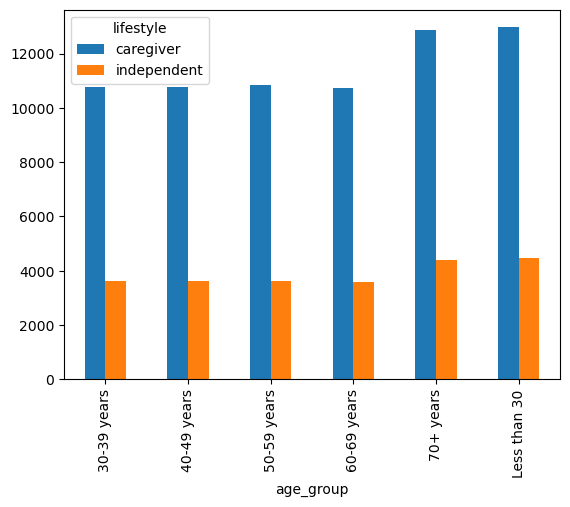

In [129]:
#print chart and save for export
bar_meatless_agegroup_lifestyle = crosstab_6v2.plot.bar()

In [137]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meatless_agegroup_lifestyle.figure.savefig(save_path)




In [140]:
#family status of meatless consumers by age
#create crosstab to evaluate customers' family status by age group
crosstab_6v3 = pd.crosstab(clean_no_meat['age_group'], clean_no_meat['marital_status'], dropna = False)

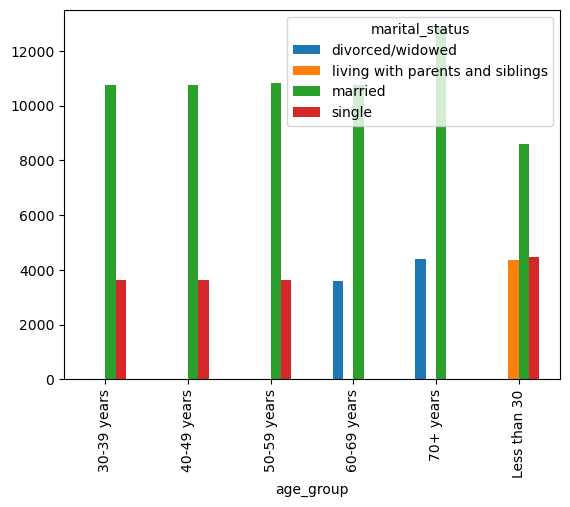

In [142]:
#print chart and save for export
bar_meatless_agegroup_famstatus = crosstab_6v3.plot.bar()

In [143]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meatless_agegroup_famstatus.figure.savefig(save_path)

### lifestyle and family status of meatless consumers

In [144]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v4 = pd.crosstab(clean_no_meat['lifestyle'], clean_no_meat['marital_status'], dropna = False)

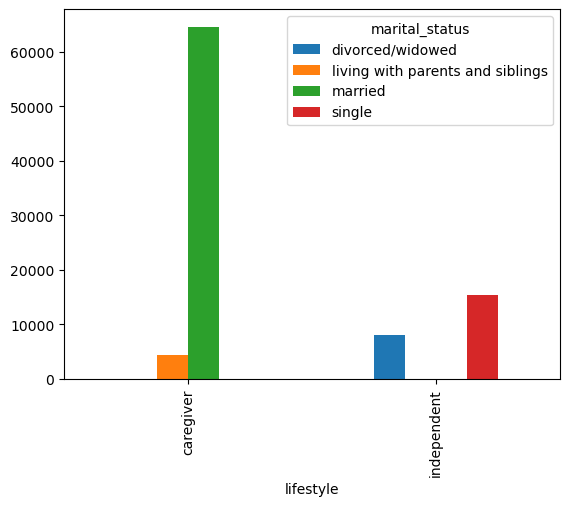

In [145]:
#print chart and save for export
bar_meatless_lifestyle_famstatus = crosstab_6v4.plot.bar()

In [146]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meatless_lifestyle_famstatus.figure.savefig(save_path)

### wealth status and family status of meatless consumers

In [147]:
#create crosstab to evaluate customers' family status by wealth
crosstab_6v5 = pd.crosstab(clean_no_meat['wealth_status'], clean_no_meat['marital_status'], dropna = False)

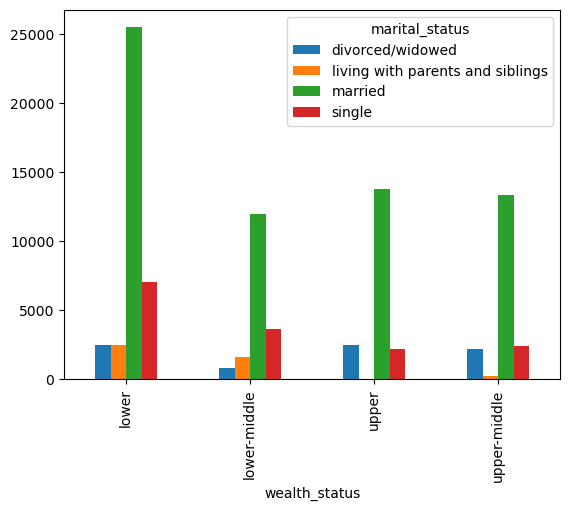

In [148]:
#print chart and save for export
bar_meatless_wealth_famstatus = crosstab_6v5.plot.bar()

In [149]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meatless_wealth_famstatus.figure.savefig(save_path)

### wealth status and loyalty status of meatless consumers

In [150]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v5b = pd.crosstab(clean_no_meat['wealth_status'], clean_no_meat['loyalty_flag'], dropna = False)

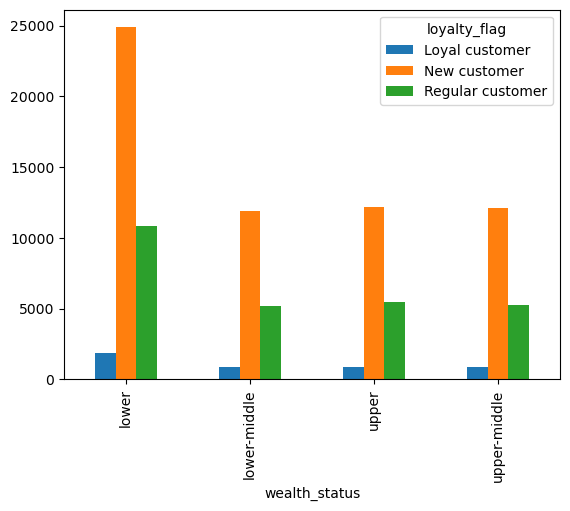

In [151]:
#print chart and save for export
bar_meatless_wealth_loyalty = crosstab_6v5b.plot.bar()

In [152]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meatless_wealth_loyalty.figure.savefig(save_path)

### gender and loyalty status of meatless consumers

In [153]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v5c = pd.crosstab(clean_no_meat['gender'], clean_no_meat['loyalty_flag'], dropna = False)

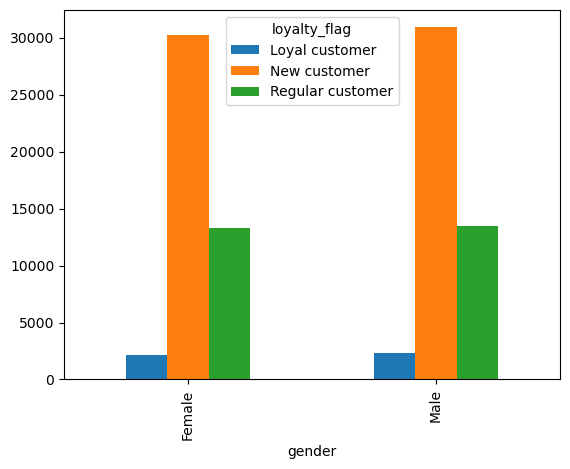

In [154]:
#print chart and save for export
bar_meatless_gender_loyalty = crosstab_6v5c.plot.bar()

In [155]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meatless_gender_loyalty.figure.savefig(save_path)

### Some conclusions:

- Within the meatless consumer profile, around 60% of the customers are married individuals with dependents, earning less than the average income. They also happen to be new customers to the platform.
- Among the 60+ age group in the meatless consumer profile, approximately 30% are divorced and have a higher income status. Interestingly, they are without children.
- In general, the 40+ age group within the meatless consumer profile tends to have a higher income compared to the under 40 age group.
- All single customers in the meatless consumer profile are without children and typically have incomes lower than the average.





### B -

In [14]:
#import
df_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_meat_consumer_subset.pkl'))

In [5]:
#check
df_meat

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_without_ordering,product_id,add_to_cart_order,reordered,product_name,...,date_joined,Number_of_Dependants,marital_status,income,region,order_activity_flag,age_group,wealth_status,lifestyle,meat_purchase
131,2293453,19,2,5,14,6.0,196,3,0,Soda,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
132,1973799,19,5,6,12,8.0,196,15,1,Soda,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
133,532817,19,7,4,17,6.0,196,1,1,Soda,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
134,2474845,19,6,5,13,20.0,17224,5,0,Oats & Honey Gluten Free Granola,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
135,86918,19,9,5,16,8.0,9387,16,0,Granny Smith Apples,...,2/3/2017,1,married,151988,South,High order activity customer,60-69 years,upper,caregiver,meat_consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404260,293966,94920,3,1,8,6.0,15629,2,1,Wine Infused Salame Cheese and Crackers Small ...,...,2/22/2020,1,married,50312,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,9/12/2017,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,9/12/2017,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,9/12/2017,3,married,46151,South,Low order activity customer,Less than 30,lower,caregiver,meat_consumer


In [17]:
#clean not relevant - duplicates
clean_meat = df_meat[selected_columns].drop_duplicates(subset='user_id')

### wealth status of meat consumers by age

In [18]:
#create crosstab to evaluate customers' wealth status by age group
crosstab_6v6 = pd.crosstab(clean_meat['age_group'], clean_meat['wealth_status'], dropna = False)

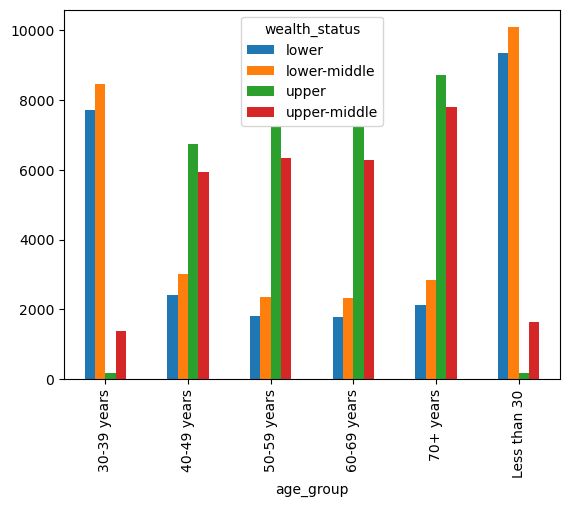

In [19]:
#print chart and save for export
bar_meat_agegroup_wealthstatus = crosstab_6v6.plot.bar()

In [20]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_agegroup_wealthstatus.figure.savefig(save_path)

### lifestyle of meat consumers by age¶

In [21]:
#create crosstab to evaluate customers' lifestyle by age group
crosstab_6v7 = pd.crosstab(clean_meat['age_group'], clean_meat['lifestyle'], dropna = False)

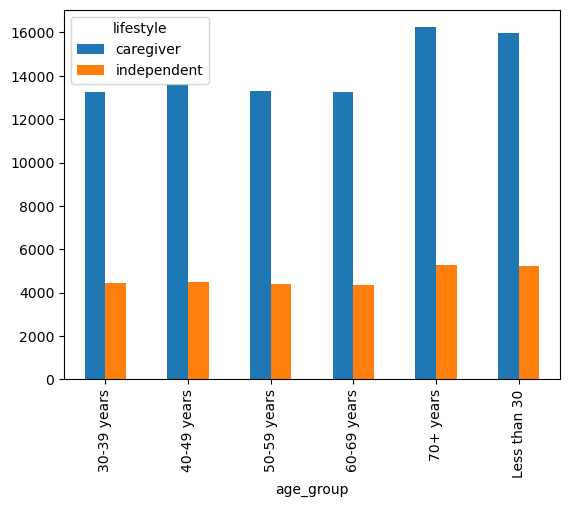

In [22]:
#print chart and save for export
bar_meat_agegroup_lifestyle = crosstab_6v7.plot.bar()

In [23]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_agegroup_lifestyle.figure.savefig(save_path)

### family status of meat consumers by age

In [25]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v8 = pd.crosstab(clean_meat['age_group'], clean_meat['marital_status'], dropna = False)

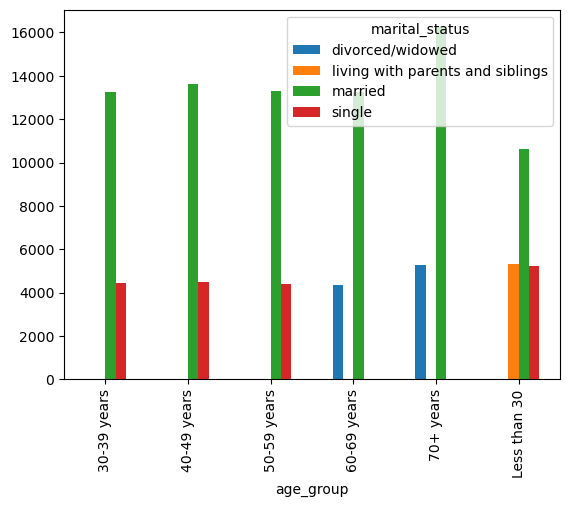

In [26]:
#print chart and save for export
bar_meat_agegroup_familystatus = crosstab_6v8.plot.bar()

In [27]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_agegroup_familystatus.figure.savefig(save_path)

###  lifestyle and family status of meat consumers

In [29]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v9 = pd.crosstab(clean_meat['lifestyle'], clean_meat['marital_status'], dropna = False)

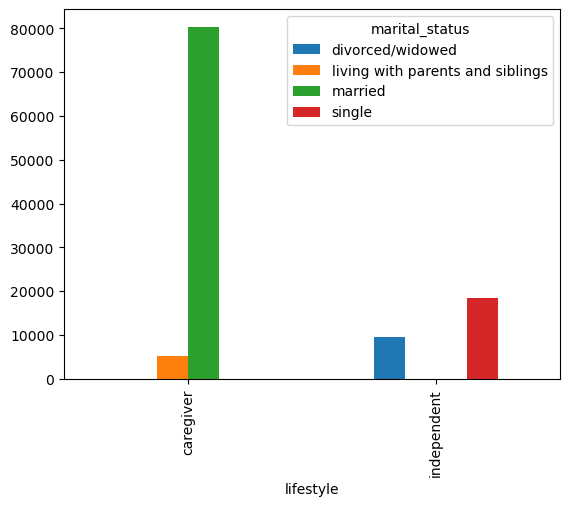

In [30]:
#print chart and save for export
bar_meat_lifestyle_famstatus = crosstab_6v9.plot.bar()

In [31]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_lifestyle_famstatus.figure.savefig(save_path)

### wealth status and family status of meat consumers

In [33]:
#create crosstab to evaluate customers' family status by age group
crosstab_6v10 = pd.crosstab(clean_meat['wealth_status'], clean_meat['marital_status'], dropna = False)

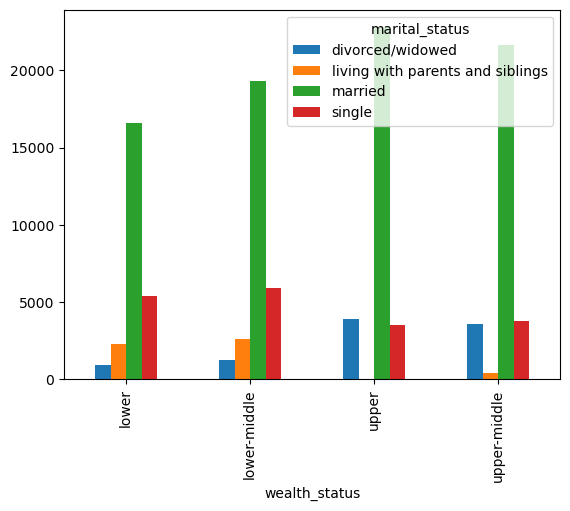

In [34]:
#print chart and save for export
bar_meat_wealth_famstatus = crosstab_6v10.plot.bar()

In [35]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_wealth_famstatus.figure.savefig(save_path)

### wealth status and loyalty status of meat consumers

In [36]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v11 = pd.crosstab(clean_meat['wealth_status'], clean_meat['loyalty_flag'], dropna = False)

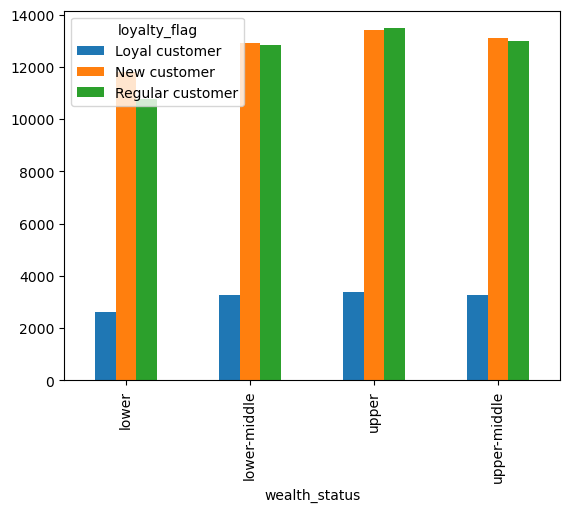

In [37]:
#print chart and save for export
bar_meat_wealth_loyalty = crosstab_6v11.plot.bar()

In [39]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_wealth_loyalty.figure.savefig(save_path)

###  gender and loyalty status of meat consumers

In [40]:
#create crosstab to evaluate customers'wealth status by age group
crosstab_6v12 = pd.crosstab(clean_meat['gender'], clean_meat['loyalty_flag'], dropna = False)

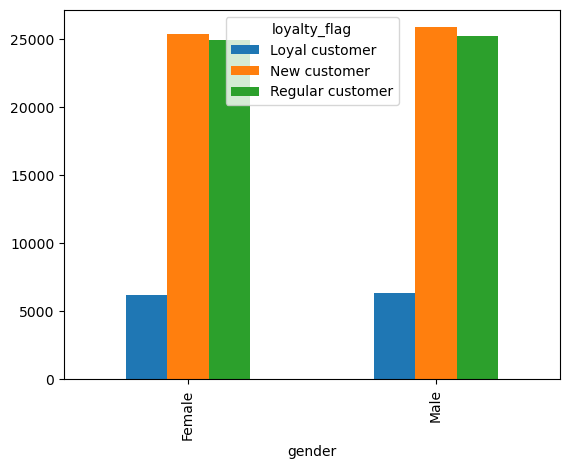

In [41]:
#print chart and save for export
bar_meat_gender_loyalty = crosstab_6v12.plot.bar()

In [42]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_gender_loyalty.figure.savefig(save_path)

### Some conclusions:

Within the realm of meat-consuming households, comprising a total of 113,891 customers (55% of the overall sample), an intriguing array of insights emerges:

- Among this cohort, approximately 60% of the customers belong to the married segment, displaying an inclination towards having dependents and the potential for attaining above-average income status. This group appears to have a notable presence within the meat-consuming populace.

- Following closely behind, the single demographic emerges as the second largest group within the meat-consuming households. Notably, a significant portion of these individuals tends to have incomes lower than the average, indicating a distinctive economic profile.

- Intriguingly, divorced customers within the meat cohort exhibit similar characteristics to their meatless counterparts. This suggests a parallelism in attributes and preferences, despite the divergence in dietary choices.

- Delving deeper, the data unveils a conspicuous observation: the distribution of customer loyalty appears to be evenly spread across different demographic segments within the meat-consuming population. This indicates that regular patrons are dispersed across various socio-demographic backgrounds, presenting an interesting pattern of customer loyalty.

## 7

### No meat customer

In [43]:
f_no_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_not_meat_consumer_subset.pkl'))

In [47]:
#check columns 
df_no_meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642240 entries, 0 to 32404854
Data columns (total 38 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_without_ordering  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  busiest_day            object  
 15  busiest_days           object  
 16  busiest_period_of_day  object  
 17  max_order              int64   
 18  loyalty_flag           object  
 19  average_price          float64 
 20  spending_flag          object  
 21  median_prior_orders    float64

## oder_number agregated
### age_group

In [48]:
df_no_meat.groupby('age_group').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                      max min       mean
age_group                               
30-39 years            99   1  14.379999
40-49 years            99   1  14.645219
50-59 years            99   1  14.589719
60-69 years            99   1  14.541701
70+ years              99   1  14.268462
Less than 30           99   1  14.646259

### lifestyle

In [49]:
df_no_meat.groupby('lifestyle').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                     max min       mean
lifestyle                              
caregiver             99   1  14.473130
independent           99   1  14.614899

### wealth-status

In [50]:
df_no_meat.groupby('wealth_status').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                       max min       mean
wealth_status                            
lower                   99   1  14.655541
lower-middle            99   1  14.419293
upper                   99   1  14.393162
upper-middle            99   1  14.459474

## order_number aggregated
### age_group

In [51]:
df_no_meat.groupby('age_group').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                      max min       mean
age_group                               
30-39 years            99   1  14.379999
40-49 years            99   1  14.645219
50-59 years            99   1  14.589719
60-69 years            99   1  14.541701
70+ years              99   1  14.268462
Less than 30           99   1  14.646259

### lifestyle

In [52]:
df_no_meat.groupby('lifestyle').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                     max min       mean
lifestyle                              
caregiver             99   1  14.473130
independent           99   1  14.614899

### wealth-status

In [53]:
df_no_meat.groupby('wealth_status').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                       max min       mean
wealth_status                            
lower                   99   1  14.655541
lower-middle            99   1  14.419293
upper                   99   1  14.393162
upper-middle            99   1  14.459474

## Meat purchasing customers

In [54]:
df_meat = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_meat_consumer_subset.pkl'))

In [55]:
#check columns 
df_meat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23762619 entries, 131 to 32404858
Data columns (total 38 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                object  
 2   order_number           int64   
 3   orders_day_of_week     int64   
 4   order_hour_of_day      int64   
 5   days_without_ordering  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  busiest_day            object  
 15  busiest_days           object  
 16  busiest_period_of_day  object  
 17  max_order              int64   
 18  loyalty_flag           object  
 19  average_price          float64 
 20  spending_flag          object  
 21  median_prior_orders    floa

## order_number aggregated
### age_group

In [57]:
df_meat.groupby('age_group').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                      max min       mean
age_group                               
30-39 years            99   1  18.285169
40-49 years            99   1  18.045736
50-59 years            99   1  18.066382
60-69 years            99   1  18.061164
70+ years              99   1  18.128828
Less than 30           99   1  18.022737

### lifestyle

In [58]:
df_meat.groupby('lifestyle').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                     max min       mean
lifestyle                              
caregiver             99   1  18.055736
independent           99   1  18.233624

### wealth_status

In [59]:
df_meat.groupby('wealth_status').agg({'order_number': ['max', 'min', 'mean']})

order_number               
                       max min       mean
wealth_status                            
lower                   99   1  17.941433
lower-middle            99   1  18.286664
upper                   99   1  18.148001
upper-middle            99   1  17.987343

## prices aggregated
### age_group

In [60]:
df_meat.groupby('age_group').agg({'prices': ['max', 'min', 'mean']})

prices               
                max  min      mean
age_group                         
30-39 years    25.0  1.0  7.897958
40-49 years    25.0  1.0  7.912117
50-59 years    25.0  1.0  7.898118
60-69 years    25.0  1.0  7.910955
70+ years      25.0  1.0  7.909447
Less than 30   25.0  1.0  7.906296

### lifestyle

In [61]:
df_meat.groupby('lifestyle').agg({'prices': ['max', 'min', 'mean']})

prices               
               max  min      mean
lifestyle                        
caregiver     25.0  1.0  7.907519
independent   25.0  1.0  7.901237

### wealth_status

In [62]:
df_meat.groupby('wealth_status').agg({'prices': ['max', 'min', 'mean']})

prices               
                 max  min      mean
wealth_status                      
lower           25.0  1.0  7.571895
lower-middle    25.0  1.0  7.988374
upper           25.0  1.0  7.991308
upper-middle    25.0  1.0  7.996024

### Conclusions

When it comes to people who consume meat, they tend to buy more items and choose products that are more expensive, on average.

Meat consumers have a tendency to purchase larger quantities of items, indicating that they buy more things overall and have bigger shopping carts.

Additionally, meat consumers show a preference for higher-priced products. This means they are willing to spend more money on items that are considered to be of better quality or offer additional features.

Understanding these characteristics of meat consumers provides us with valuable information to better meet their needs and preferences by offering suitable products and strategies.

# 8

### No meat consuming customers by region and department

In [63]:
#create crosstab to evaluate meatless customer region and departments 
crosstab_8a = pd.crosstab(df_no_meat['department_id'], df_no_meat['region'], dropna = False)

In [64]:
#check
crosstab_8a

region,Midwest,Northeast,South,West
department_id,,,,
1,134707,98073,192369,145425
2,2812,2179,3903,2969
3,66865,50286,91563,71586
4,550840,403804,779308,590849
5,17330,11608,23068,18147
6,15146,11090,20886,16565
7,232021,177410,327250,246787
8,5597,5119,8129,6987
9,41122,29917,57155,43555


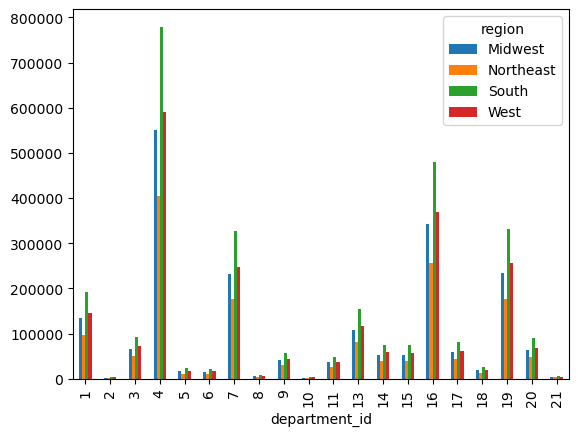

In [65]:
#print bar chart and save for export
bar_no_meat_region_dept = crosstab_8a.plot.bar()

In [66]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_no_meat_region_dept.figure.savefig(save_path)

### meat consuming customers by region and departments

In [67]:
#create crosstab to evaluate meatless customer region and departments 
crosstab_8b = pd.crosstab(df_meat['department_id'], df_meat['region'], dropna = False)

In [68]:
#check
crosstab_8b

region,Midwest,Northeast,South,West
department_id,,,,
1,389389,292845,555531,426404
2,5608,4406,8309,6105
3,207004,158313,297252,229559
4,1677097,1262035,2381243,1834115
5,18856,14934,28556,21197
6,48590,35801,68256,52919
7,393553,306008,571690,433404
8,16758,13482,23140,18504
9,162647,121899,230289,180043


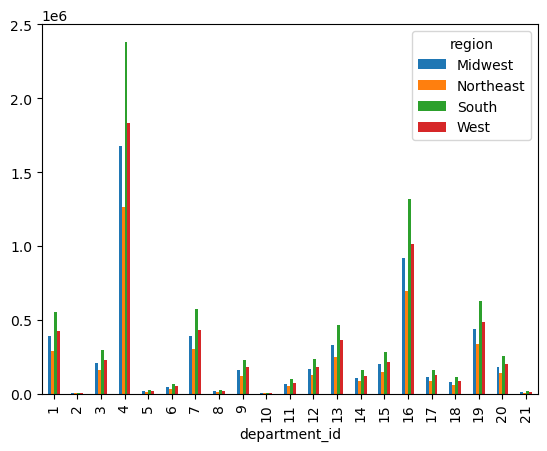

In [69]:
#print bar chart and save for export
bar_meat_region_dept = crosstab_8b.plot.bar()

In [70]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_meat_region_dept.figure.savefig(save_path)

## 9

In order to optimize the effectiveness of advertisements, the sales team requires insights into the peak activity periods during the week and throughout the day. By identifying the busiest days and hours with the highest number of orders, they can strategically schedule ads during periods of lower order volume. This approach ensures that ads reach a larger audience during times when there is less competition, maximizing their impact and potential for generating sales.

In [71]:
#create crosstab to evaluate total customers 
crosstab_9_1 = pd.crosstab(df['busiest_period_of_day'], df['busiest_days'], dropna = False)

In [72]:
#check
crosstab_9_1

busiest_days,Busiest days,Regular days,Slowest days
busiest_period_of_day,,,
Average orders,5532812,6293200,3853853
Fewest orders,198245,252612,145471
Most orders,6133355,6370299,3625012


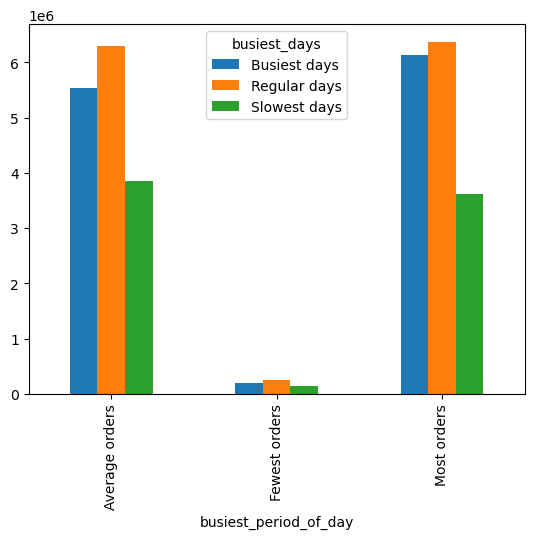

In [73]:
#print bar chart and save for export
bar_busiesthours_busiestdays = crosstab_9_1.plot.bar()


In [74]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_busiesthours_busiestdays.figure.savefig(save_path)

### Exploring the Relationship between Age and Family Status in Ordering Habits

In [86]:
#create crosstab to evaluate total customers 
crosstab_9_3 = pd.crosstab(df['department_id'], df['marital_status'], dropna = False)

In [87]:
#check
crosstab_9_3

marital_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1,193575,108533,1569050,363585
2,3002,1911,25205,6173
3,100401,56142,821881,194004
4,812834,449628,6654218,1562611
5,12615,8896,105682,26503
6,23060,13074,188466,44653
7,231025,124629,1889052,443417
8,8409,5620,67513,16174
9,74220,41702,609663,141042


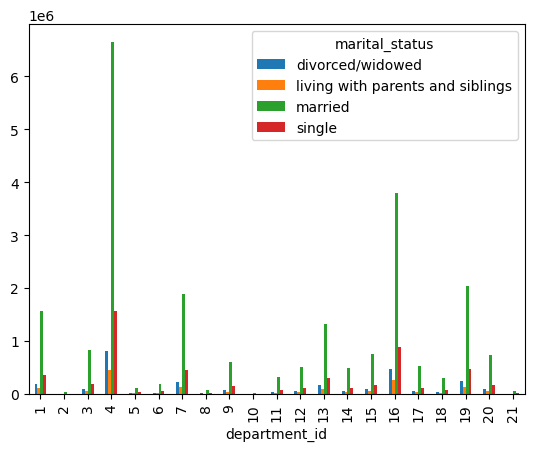

In [88]:
#print bar chart and save for export
bar_dept_family = crosstab_9_3.plot.bar()

In [89]:
#export
save_path = r'C:\Users\ggome\06-2023 Instacart Basket Analysis\04  Analysis\Visualizations\bar_meatless_agegroup_lifestyle.png'
bar_dept_family.figure.savefig(save_path)